In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
import torch
from torch import nn
from torch.utils.data import DataLoader

import torchvision
from torchvision.transforms import ToTensor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dataset import ImageDataset, DSubset, Label, get_channel_means_stdevs

import pickle

In [80]:
label_type = Label.REAL_OR_SYNTHETIC

train_dataset = ImageDataset(DSubset.TRAIN, label_type)
test_dataset = ImageDataset(DSubset.TEST, label_type)

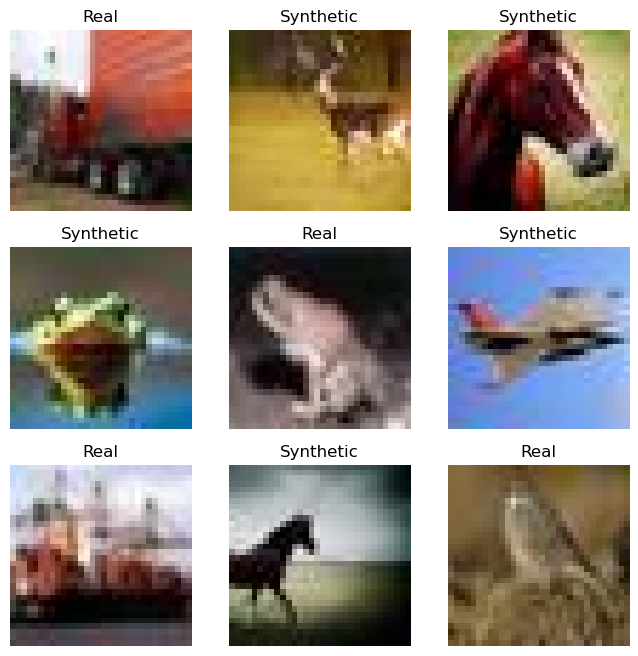

In [81]:
object_labels_map = {
    1: 'Airplane',
    2: 'Automobile',
    3: 'Bird',
    4: 'Cat',
    5: 'Deer',
    6: 'Dog',
    7: 'Frog',
    8: 'Horse',
    9: 'Ship',
    10: 'Truck'
}

synthetic_labels_map = {
    0: 'Real',
    1: 'Synthetic'
}

# DISPLAY SAMPLE IMAGES FROM DATASET

figure = plt.figure(figsize = (8,8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_index = torch.randint(high = len(train_dataset), size = (1,)).item()

    image, label = train_dataset[sample_index]
    np_image = image.numpy()

    figure.add_subplot(rows, cols, i)

    plt.title(object_labels_map[label] if label_type == Label.OBJECT else synthetic_labels_map[label])
    plt.axis('off')
    plt.imshow(np_image.transpose(1, 2, 0), cmap = 'rainbow')

plt.show()

In [82]:
train_dataloader = DataLoader(train_dataset, batch_size = 100)

channel_means, channel_stdevs = get_channel_means_stdevs(train_dataloader, num_channels = 3, verbose = True)

print(channel_means)
print(channel_stdevs)

Processed 10000 total images.
Processed 20000 total images.
Processed 30000 total images.
Processed 40000 total images.
Processed 50000 total images.
Processed 60000 total images.
Processed 70000 total images.
Processed 80000 total images.
Processed 90000 total images.
Processed 100000 total images.
(0.47199389338493347, 0.4628933072090149, 0.417815238237381)
(0.23757517337799072, 0.23742368817329407, 0.26595625281333923)


In [83]:
with open('../results/channel_training_statistics.pkl', 'wb') as f:
    pickle.dump((channel_means, channel_stdevs), f)